## Load data from RDS

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
%matplotlib inline

In [2]:
cnx = mysql.connector.connect(user='ymdsmaster', password='XXXXX',
                              host='yieldmanagement.c2jaydssljuc.us-west-2.rds.amazonaws.com', port = 6174,
                              database='yieldmanagement')

In [3]:
cursor = cnx.cursor(buffered=True)
start_date = '2017-07-01'
end_date = '2017-12-31'
channel='A&E'

query = (f"SELECT network_label, start_time, household_impressions, timeslot FROM yieldmanagement.viewership_tmp where start_date BETWEEN '{start_date}' AND '{end_date}' AND network_label IN ('{channel}') ORDER BY network_label, start_time;")

cursor.execute(query)
data = pd.DataFrame(cursor.fetchall(), columns=['network_label', 'start_time', 'household_impressions', 'timeslot'])

cursor.close()

data.head()

,network_label,start_time,household_impressions,timeslot
0,A&E,2017-10-25 00:00:00,23200,1
1,A&E,2017-10-25 00:15:00,20411,2
2,A&E,2017-10-25 00:30:00,19270,3
3,A&E,2017-10-25 00:45:00,17392,4
4,A&E,2017-10-25 01:00:00,17633,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6528 entries, 0 to 6527
Data columns (total 4 columns):
network_label            6528 non-null object
start_time               6528 non-null datetime64[ns]
household_impressions    6528 non-null int64
timeslot                 6528 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 204.1+ KB


In [5]:
data['household_impressions'].value_counts()

20277     4
13323     3
20984     3
33343     3
13869     3
16886     3
16328     3
13188     3
18728     3
19515     3
27221     3
37829     3
34049     3
24563     3
13257     3
21106     3
17029     3
18905     3
17320     3
23666     3
18566     2
23923     2
12635     2
15940     2
19980     2
15886     2
21078     2
14751     2
11360     2
5161      2
         ..
3622      1
12712     1
17694     1
16752     1
38176     1
25890     1
16311     1
13075     1
81133     1
19715     1
13857     1
58925     1
29936     1
15601     1
17650     1
35823     1
72949     1
17654     1
21198     1
82547     1
117221    1
36091     1
72961     1
56573     1
25496     1
11519     1
29952     1
15617     1
75010     1
16384     1
Name: household_impressions, Length: 6152, dtype: int64

In [12]:
data.set_index(data['start_time'], inplace = True)

In [14]:
data.index

DatetimeIndex(['2017-10-25 00:00:00', '2017-10-25 00:15:00',
               '2017-10-25 00:30:00', '2017-10-25 00:45:00',
               '2017-10-25 01:00:00', '2017-10-25 01:15:00',
               '2017-10-25 01:30:00', '2017-10-25 01:45:00',
               '2017-10-25 02:00:00', '2017-10-25 02:15:00',
               ...
               '2017-12-31 21:30:00', '2017-12-31 21:45:00',
               '2017-12-31 22:00:00', '2017-12-31 22:15:00',
               '2017-12-31 22:30:00', '2017-12-31 22:45:00',
               '2017-12-31 23:00:00', '2017-12-31 23:15:00',
               '2017-12-31 23:30:00', '2017-12-31 23:45:00'],
              dtype='datetime64[ns]', name='start_time', length=6528, freq=None)

(array([1773., 2336., 1144.,  591.,  251.,  165.,   88.,   99.,   67.,
          14.]),
 array([  2331. ,  16234.4,  30137.8,  44041.2,  57944.6,  71848. ,
         85751.4,  99654.8, 113558.2, 127461.6, 141365. ]),
 <a list of 10 Patch objects>)

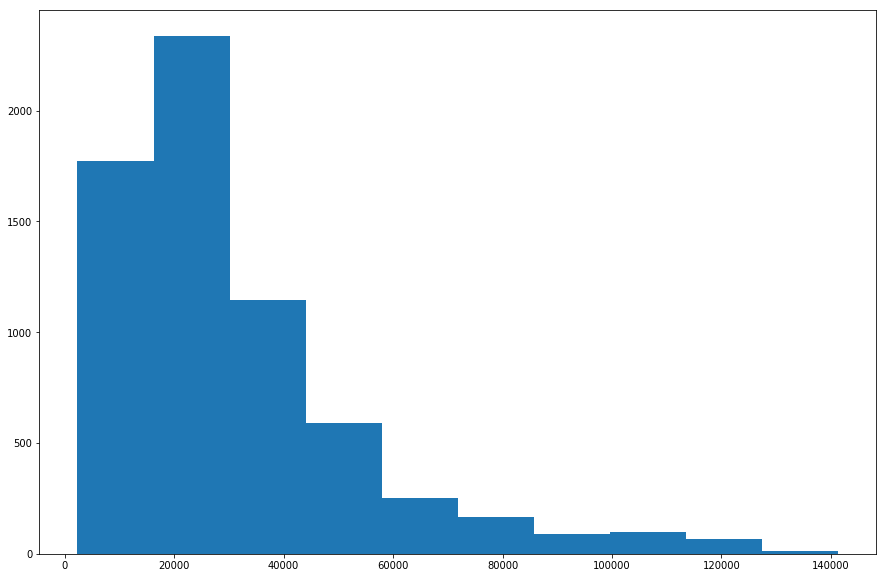

In [6]:
fig, ax = plt.subplots(figsize = (15,10))
ax.hist(data['household_impressions'])

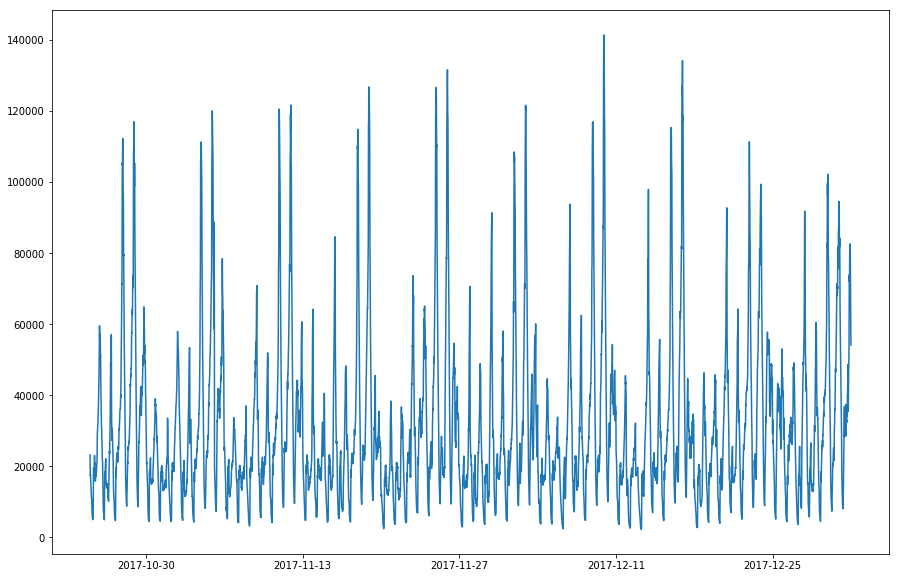

In [7]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(data['start_time'],data['household_impressions'])

In [8]:
import statsmodels.api as sm

/home/ec2-user/anaconda3/envs/forecasting/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


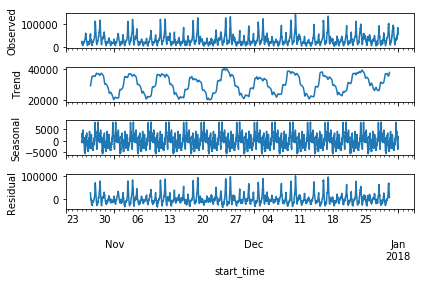

In [28]:
decomposition = sm.tsa.seasonal_decompose(series, model='additive', freq=365)
fig = decomposition.plot()
plt.show()

In [18]:
series = pd.Series(data['household_impressions'])

/home/ec2-user/anaconda3/envs/forecasting/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  from ipykernel import kernelapp as app


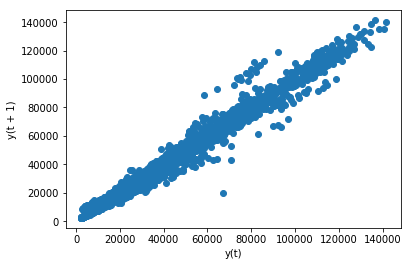

In [31]:
from pandas.tools.plotting import lag_plot
lag_plot(series)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X = series.values

In [35]:
series.shape

(6528,)

In [78]:
6528*.95

6201.599999999999

In [79]:
train = X[:6202]

In [80]:
test = X[6202:]

In [81]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [82]:
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 34
Coefficients: [ 7.34460607e+02  1.31782647e+00 -2.48401719e-01 -1.42120526e-02
  3.02572459e-02 -7.96789611e-02  2.57122034e-02 -3.97343935e-02
 -4.51832018e-02  5.83696557e-02  3.86823077e-04 -1.34217202e-02
 -1.31246233e-01  1.53704408e-01 -1.54615795e-02 -1.81451665e-03
  4.52645478e-02 -7.95730837e-02  5.52129319e-03 -1.64379772e-02
  2.59331577e-02 -1.60314598e-02  1.72254660e-02  4.44238016e-03
 -1.46703208e-02  3.77745185e-03  1.89657374e-02 -7.22713961e-03
 -1.40399595e-02 -1.24628867e-02  3.13430603e-02 -1.52041783e-02
  3.27704424e-03 -3.19205480e-02  3.02575911e-02]


In [56]:
(29 * 15)/60

7.25

In [83]:
predictions = model_fit.predict(len(train), end=len(train)+len(test)-1, dynamic=False)

In [84]:
print(predictions.shape)
print(test.shape)

(326,)
(326,)


In [85]:
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))


predicted=13755.924891, expected=12889.000000
predicted=14454.379392, expected=13216.000000
predicted=15135.167715, expected=15173.000000
predicted=15903.701149, expected=15197.000000
predicted=16590.651122, expected=14593.000000
predicted=17291.264356, expected=14747.000000
predicted=17948.107069, expected=17473.000000
predicted=18864.715536, expected=20592.000000
predicted=19664.724600, expected=22782.000000
predicted=20267.225412, expected=24784.000000
predicted=20907.772837, expected=26145.000000
predicted=21756.029170, expected=28174.000000
predicted=22440.417218, expected=29485.000000
predicted=23087.930091, expected=31581.000000
predicted=23732.227746, expected=29696.000000
predicted=24539.989934, expected=31390.000000
predicted=25327.198818, expected=32834.000000
predicted=26108.277702, expected=34721.000000
predicted=26816.914721, expected=36583.000000
predicted=27423.507787, expected=40239.000000
predicted=28021.055704, expected=42768.000000
predicted=28620.895929, expected=4

In [86]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 673659065.816


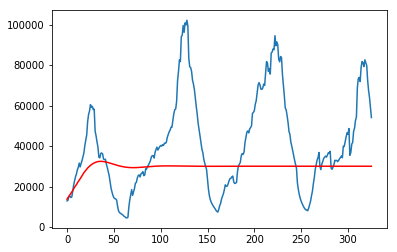

In [87]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [88]:
data['household_impressions'].mean()

30480.908854166668

{'boxes': [<matplotlib.lines.Line2D at 0x7f1f4c4ca208>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1f4c4cac18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1f4c4b88d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1f4c4b84a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1f4c4ca358>,
  <matplotlib.lines.Line2D at 0x7f1f4c4ca7f0>]}

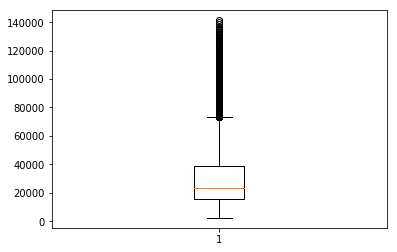

In [90]:
fig,ax = plt.subplots()
ax.boxplot(data['household_impressions'])

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data['start_time'],data['household_impressions'])

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
model = LinearRegression()

In [95]:
model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=['2017-11-17T06:00:00.000000000' '2017-11-17T21:45:00.000000000'
 '2017-11-28T16:15:00.000000000' ... '2017-11-16T07:00:00.000000000'
 '2017-12-02T22:30:00.000000000' '2017-11-01T12:45:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.